In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_11676\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the StandardScaler Autoencoder dataset

In [7]:
minmaxPCA=pd.read_csv('Autoencoder_StandardScaler_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,99,100,101,102,103,104,105,106,107,priceUSD
0,0,1.272445,0.0,1.704053,1.120934,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,1.353933,0.0,1.883147,2.657742,0.0,0.000000,0.0,0.0495
1,1,1.295429,0.0,1.163925,0.983769,0.000000,0.0,0.0,0.631568,0.0,...,0.000000,0.0,1.538430,0.0,1.192652,1.870249,0.0,0.000000,0.0,0.0726
2,2,0.236208,0.0,2.837456,0.000000,0.000000,0.0,0.0,0.742867,0.0,...,0.000000,0.0,2.469148,0.0,0.563751,3.095343,0.0,2.405711,0.0,0.0859
3,3,0.000000,0.0,1.357963,0.984608,0.195242,0.0,0.0,0.322820,0.0,...,0.021757,0.0,0.676755,0.0,1.251772,1.284827,0.0,0.532028,0.0,0.0783
4,4,0.000000,0.0,1.265765,0.541070,1.093741,0.0,0.0,0.713462,0.0,...,0.000000,0.0,1.610268,0.0,1.480020,1.381913,0.0,0.505411,0.0,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,priceUSD
0,1.272445,0.000000,1.704053,1.120934,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,1.353933,0.000000,1.883147,2.657742,0.0,0.000000,0.0,0.0495
1,1.295429,0.000000,1.163925,0.983769,0.000000,0.0,0.000000,0.631568,0.0,0.000000,...,0.000000,0.000000,1.538430,0.000000,1.192652,1.870249,0.0,0.000000,0.0,0.0726
2,0.236208,0.000000,2.837456,0.000000,0.000000,0.0,0.000000,0.742867,0.0,0.000000,...,0.000000,0.000000,2.469148,0.000000,0.563751,3.095343,0.0,2.405711,0.0,0.0859
3,0.000000,0.000000,1.357963,0.984608,0.195242,0.0,0.000000,0.322820,0.0,0.000000,...,0.021757,0.000000,0.676755,0.000000,1.251772,1.284827,0.0,0.532028,0.0,0.0783
4,0.000000,0.000000,1.265765,0.541070,1.093741,0.0,0.000000,0.713462,0.0,0.000000,...,0.000000,0.000000,1.610268,0.000000,1.480020,1.381913,0.0,0.505411,0.0,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,0.000000,0.227086,0.000000,0.024436,0.179494,0.0,0.000000,0.000000,0.0,0.000000,...,0.614658,0.307597,0.039078,0.058152,1.324451,0.889618,0.0,0.000000,0.0,9349.0000
3484,0.216949,0.348079,0.000000,0.000000,0.353724,0.0,0.135385,0.255987,0.0,0.000000,...,0.427702,0.383041,0.000000,0.000000,1.422990,1.447299,0.0,0.000000,0.0,9394.0000
3485,0.000000,0.661399,0.000000,0.078300,0.341647,0.0,0.218927,0.000000,0.0,0.020619,...,0.111734,0.241010,0.000000,0.271751,1.107438,1.205667,0.0,0.000000,0.0,9366.0000
3486,0.000000,0.093544,0.000000,0.153612,0.399873,0.0,0.095809,0.000000,0.0,0.125356,...,0.298529,0.103416,0.000000,0.067724,0.839254,1.353312,0.0,0.000000,0.0,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [12]:
r_squared = regressor.score(X, y)
print(r_squared)

0.8696033133092869


In [13]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [14]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.8654355588959702

### Accuracy on linear regression

In [15]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.8719523254414289

### Defining model

### Training the Kernel SVM model on the Training set

In [16]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1767 2058  985 ... 1049 2116 2661]
continuous
multiclass
multiclass


In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

### Applying grid search to find best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [19]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 735, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=8, n_estimators=1500,
                          subsample=0.2)

 The best score across ALL searched params:
 0.902482505598834

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.2}


### Training the Random forest regression model on the whole dataset

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [24]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [25]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: 0.8897739697803364
Best Score: 0.863969239492269
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  1
--------------
R2 score: 0.8965929588276618
Best Score: 0.8671505521777825
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  2
--------------
R2 score: 0.8904098800685958
Best Score: 0.8704403873875151
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  3
--------------
R2 score: 0.8841527699322463
Best Score: 0.8641856024088155
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  4
--------------
R2 score: 0.8875459245333887
Best Score: 0.8684026644984076
Best params: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 30}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 2s 6ms/step - loss: 2116.6958 - mean_absolute_error: 2113.5232 - val_loss: 2204.4280 - val_mean_absolute_error: 2199.3467
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 1967.4637 - mean_absolute_error: 1958.8795 - val_loss: 2019.9888 - val_mean_absolute_error: 2009.5829
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 1742.5967 - mean_absolute_error: 1728.6528 - val_loss: 1579.4561 - val_mean_absolute_error: 1560.4722
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 1130.6588 - mean_absolute_error: 1106.7896 - val_loss: 1089.0056 - val_mean_absolute_error: 1062.2150
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 879.2118 - mean_absolute_error: 852.0579 - val_loss: 967.6157 - val_mean_absolute_error: 940.3318
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 806.8529 - mean_absolute_error: 779.3030 - v

140/140 [==============================] - 0s 3ms/step - loss: 448.8721 - mean_absolute_error: 422.2087 - val_loss: 658.2103 - val_mean_absolute_error: 631.3475
Epoch 49/100
140/140 [==============================] - 0s 3ms/step - loss: 451.8617 - mean_absolute_error: 425.2719 - val_loss: 647.4915 - val_mean_absolute_error: 621.0923
Epoch 50/100
140/140 [==============================] - 0s 3ms/step - loss: 439.8997 - mean_absolute_error: 413.3778 - val_loss: 624.0261 - val_mean_absolute_error: 597.5231
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 439.8430 - mean_absolute_error: 413.4695 - val_loss: 634.1488 - val_mean_absolute_error: 607.6729
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 429.7267 - mean_absolute_error: 403.3957 - val_loss: 620.7950 - val_mean_absolute_error: 594.5457
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 430.7434 - mean_absolute_error: 404.4587 - val_loss: 615.0364 - val

140/140 [==============================] - 0s 3ms/step - loss: 293.9750 - mean_absolute_error: 271.2218 - val_loss: 511.1296 - val_mean_absolute_error: 488.3795
Epoch 96/100
140/140 [==============================] - 0s 3ms/step - loss: 293.0942 - mean_absolute_error: 270.4049 - val_loss: 500.4455 - val_mean_absolute_error: 477.8286
Epoch 97/100
140/140 [==============================] - 0s 3ms/step - loss: 283.0433 - mean_absolute_error: 260.3764 - val_loss: 495.4747 - val_mean_absolute_error: 472.8357
Epoch 98/100
140/140 [==============================] - 0s 3ms/step - loss: 288.2190 - mean_absolute_error: 265.5977 - val_loss: 500.9290 - val_mean_absolute_error: 478.3549
Epoch 99/100
140/140 [==============================] - 0s 3ms/step - loss: 281.2153 - mean_absolute_error: 258.6915 - val_loss: 502.9233 - val_mean_absolute_error: 480.3742
Epoch 100/100
140/140 [==============================] - 0s 3ms/step - loss: 283.0928 - mean_absolute_error: 260.6140 - val_loss: 499.2413 - va

In [15]:
train_mse = classifier.evaluate(X_train, y_train, verbose=0)
test_mse = classifier.evaluate(X_test, y_test, verbose=0)

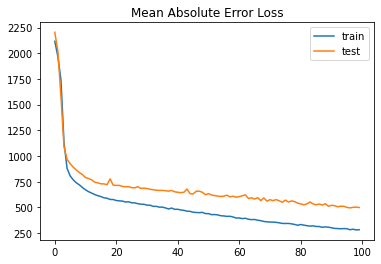

In [16]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()